 <h2>Facial Keypoint Detection</h2>         
 First of all let's discuss what we are given.        
We are given three CSV files.        
training.csv :- Its has coordinates of facial keypoints like left eye, rigth eye etc and also the image.      
test.csv :- Its has image only and we have to give coordinates of various facial keypoints by looking at third csv file which is IdLookupTable.csv     
Rest everything is explained below.      
**I would really appreciate if you could upvote this kernel.**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

In [2]:
Train_Dir = '../input/training/training.csv'
Test_Dir = '../input/test/test.csv'
lookid_dir = '../input/IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)
os.listdir('../input')

['test', 'IdLookupTable.csv', 'SampleSubmission.csv', 'training']

Lets explore our dataset

In [3]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


Lets check for missing values

In [4]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

So there are missing values in 28 columns. We can do two things here one remove the rows having missing values and another is the fill missing values with something. I used two option as removing rows will reduce our dataset. 
I filled the missing values with the previous values in that row.

In [5]:

train_data.fillna(method = 'ffill',inplace = True)
#train_data.reset_index(drop = True,inplace = True)


Lets check for missing values now

In [6]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

As there is no missing values we can now separate the labels and features.
The image is our feature and other values are labes that we have to predict later.
As image column values are in string format and there is also some missing values so we have to split the string by space and append it and also handling missing values

In [7]:

imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)
    
    

Lets reshape and convert it into float value.

In [8]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)



Lets see what is the first image.

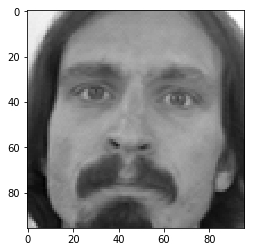

In [9]:
plt.imshow(X_train[0].reshape(96,96),cmap='gray')
plt.show()

Now lets separate labels.

In [10]:
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')



As our data is ready for training , lets define our model. I am using keras and simple dense layers. For loss function I am using 'mse' ( mean squared error ) as we have to predict new values. Our result evaluted on the basics of 'mae' ( mean absolute error ) . 

In [11]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])




Using TensorFlow backend.


In [12]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [13]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
__________

In [14]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

Now our model is defined and we will train it by calling fit method. I ran it for 500 iteration keeping batch size and validtion set size as 20% ( 20% of the training data will be kept for validating the model ).

In [15]:
model.fit(X_train,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/50
5639/5639 [==============================] - 10s 2ms/step - loss: 377.6182 - mean_absolute_error: 12.6949 - val_loss: 1379.9186 - val_mean_absolute_error: 34.0214
Epoch 2/50
5639/5639 [==============================] - 4s 714us/step - loss: 33.4846 - mean_absolute_error: 4.5120 - val_loss: 155.8508 - val_mean_absolute_error: 11.2401
Epoch 3/50
5639/5639 [==============================] - 4s 714us/step - loss: 27.0987 - mean_absolute_error: 4.0227 - val_loss: 43.9558 - val_mean_absolute_error: 5.6561
Epoch 4/50
5639/5639 [==============================] - 4s 713us/step - loss: 24.3302 - mean_absolute_error: 3.7967 - val_loss: 14.7447 - val_mean_absolute_error: 3.1370
Epoch 5/50
5639/5639 [==============================] - 4s 713us/step - loss: 22.8195 - mean_absolute_error: 3.6605 - val_loss: 11.0507 - val_mean_absolute_error: 2.5203
Epoch 6/50
5639/5639 [==============================] - 4s 713us/step - loss: 21.2416 - mean_abs

Now lets prepare our testing data

In [16]:
#preparing test data
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

Reshaping and converting 

In [17]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 

Lets see first image in out test data

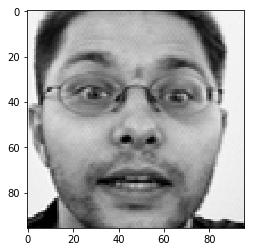

In [18]:
plt.imshow(X_test[0].reshape(96,96),cmap = 'gray')
plt.show()

Lets predict our results

In [19]:
pred = model.predict(X_test)

Now the last step is the create our submission file keeping in the mind required format.
There should be two columns :- RowId and Location
Location column values should be filled according the lookup table provided ( IdLookupTable.csv)


In [20]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [21]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [22]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [23]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [24]:
rowid = pd.Series(rowid,name = 'RowId')

In [25]:
loc = pd.Series(preded,name = 'Location')

In [26]:
submission = pd.concat([rowid,loc],axis = 1)


In [27]:
submission.to_csv('face_key_detection_submission.csv',index = False)